In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 14})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0, 1, dt)
f = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)  # Sum of 2 frequencies
f_clean = f
f = f + 2.5 * np.random.randn(len(t))  # Add some noise

In [2]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f, n)  # Compute the FFT
PSD = fhat * np.conj(fhat) / n  # Power spectrum (power per freq)
freq = (1 / (dt * n)) * np.arange(n)  # Create x-axis of frequencies in Hz
L = np.arange(1, np.floor(n / 2), dtype='int')  # Only plot the first half of freqs


In [3]:
## Use the PSD to filter out noise
indices = PSD > 100  # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat  # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat)  # Inverse FFT for filtered time signal

/Users/quyenlinhta/.conda/envs/DataAnalysisPSL/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/quyenlinhta/.conda/envs/DataAnalysisPSL/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/quyenlinhta/.conda/envs/DataAnalysisPSL/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


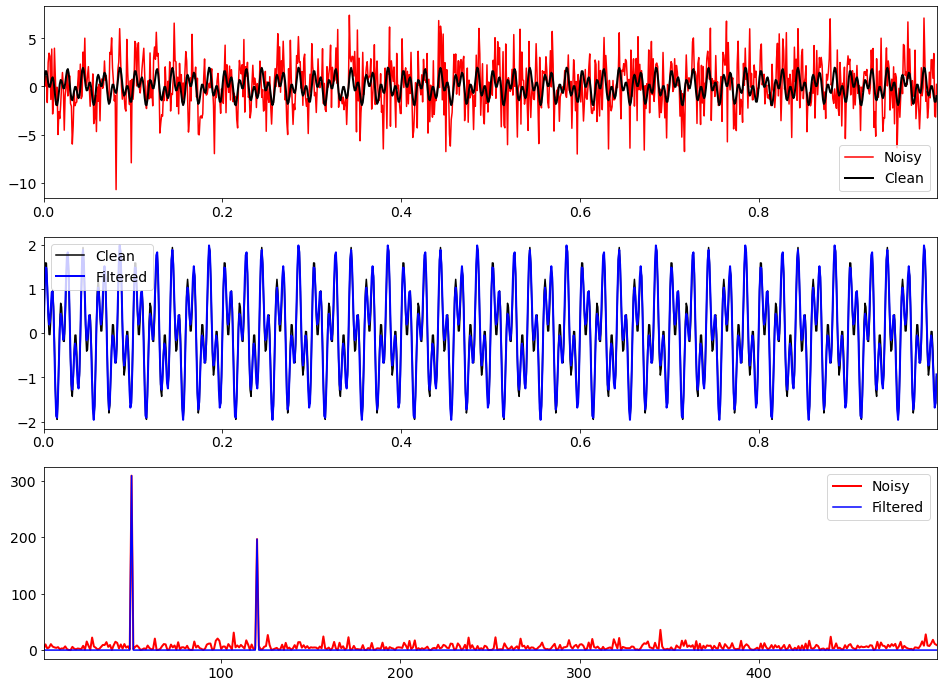

In [5]:
## Plots
fig, axs = plt.subplots(3, 1)

plt.sca(axs[0])
plt.plot(t, f, c='r', lw=1.5, label='Noisy')
plt.plot(t, f_clean, c='k', lw=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, f_clean, c='k', lw=1.5, label='Clean')
plt.plot(t, ffilt, c='b', lw=2, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], c='r', lw=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], c='b', lw=1.5, label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()